# 10-2. 가중치 초기화

## 선형 가중치 초기화
- sigmoid 함수를 활용한 가중치 초기화
- sigmoid 함수는 (-1, 1)의 범위에서 선형적인 특성을 지님

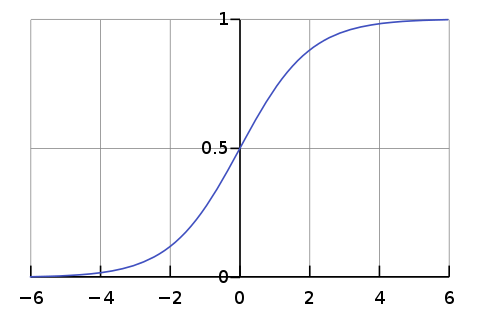

In [1]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

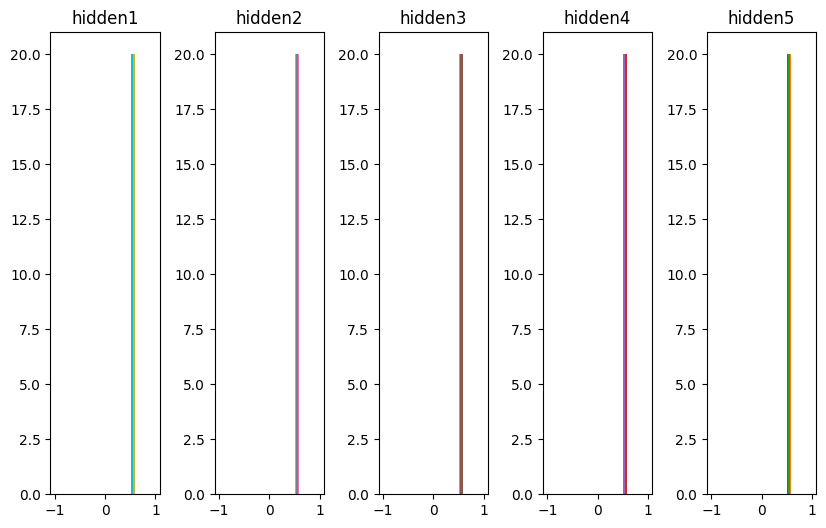

In [3]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


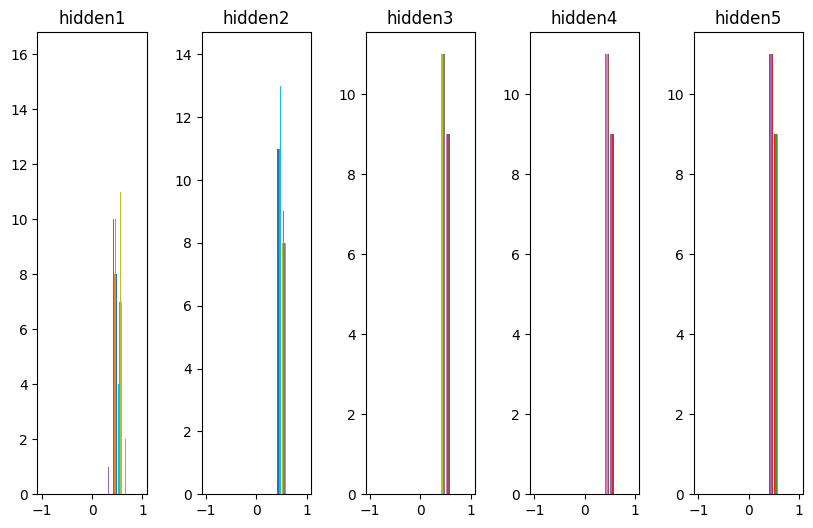

In [4]:
## 정규분포를 따르도록 무작위 값을 초기화
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


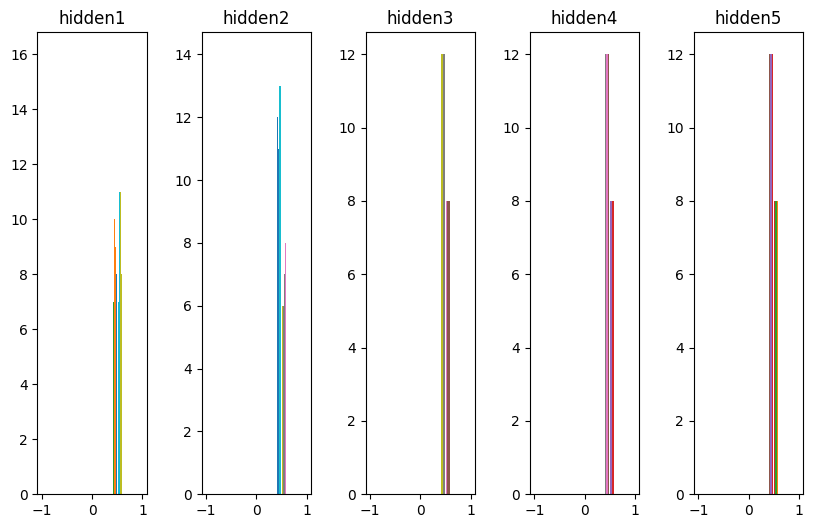

In [5]:
## 균일분포를 따르도록 무작위 초기화
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


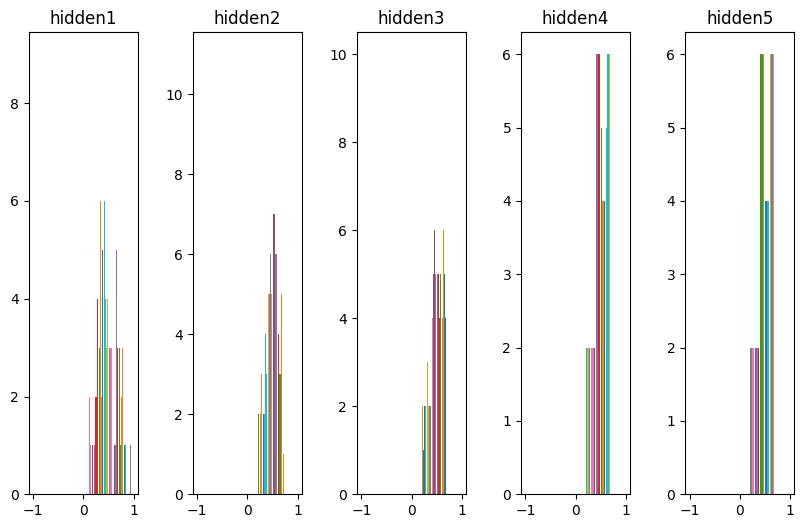

In [6]:
## Xavier(RandomUniform()) 정규분포 초기화
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

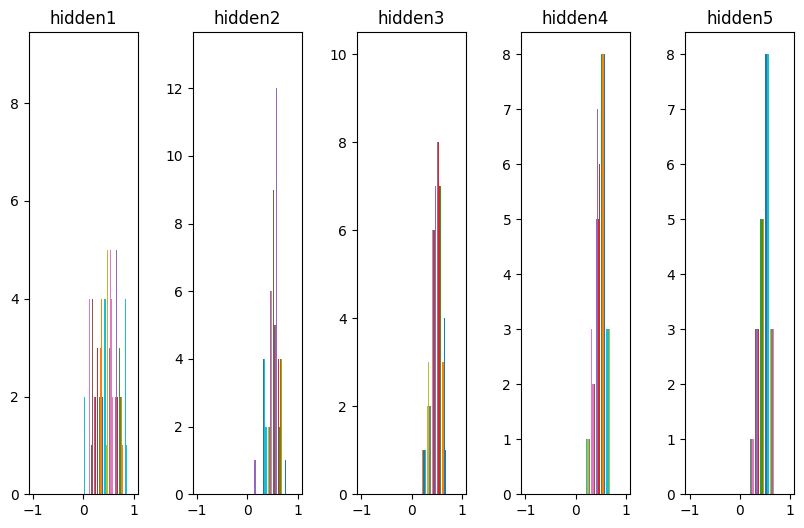

In [7]:
## Xavier(Glorot) 정규분포 초기화
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


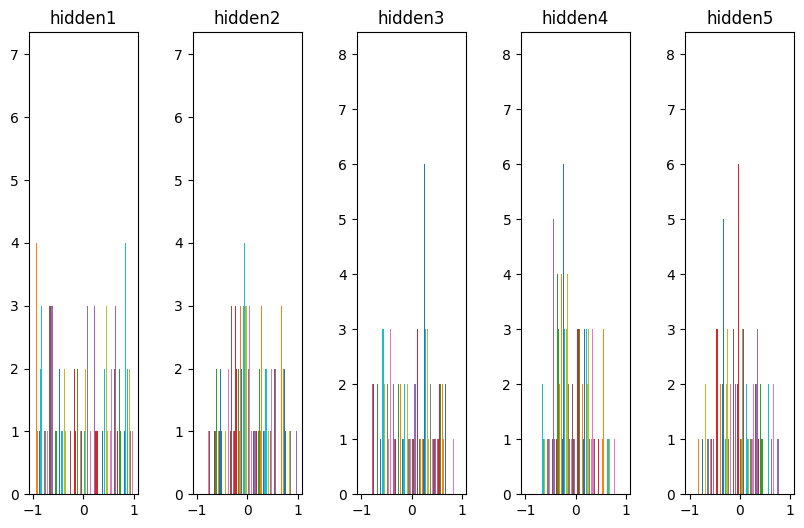

In [8]:
## sigmoid -> tanh
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


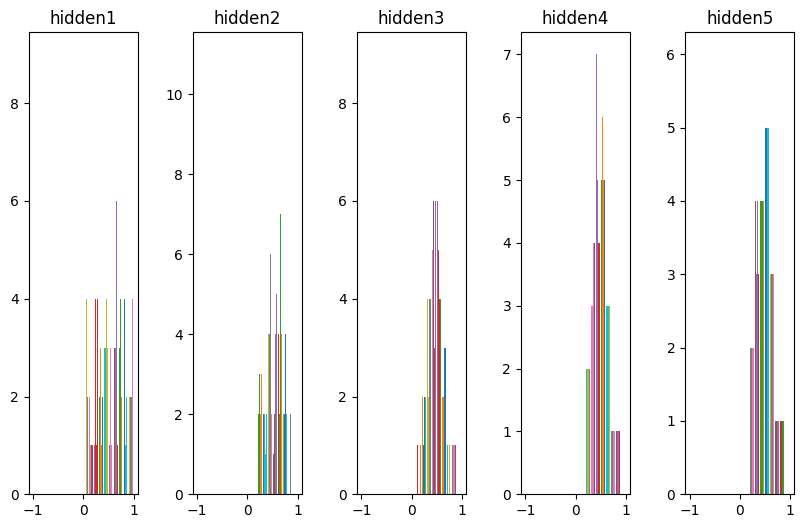

In [9]:
## He 정규분포 초기화
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


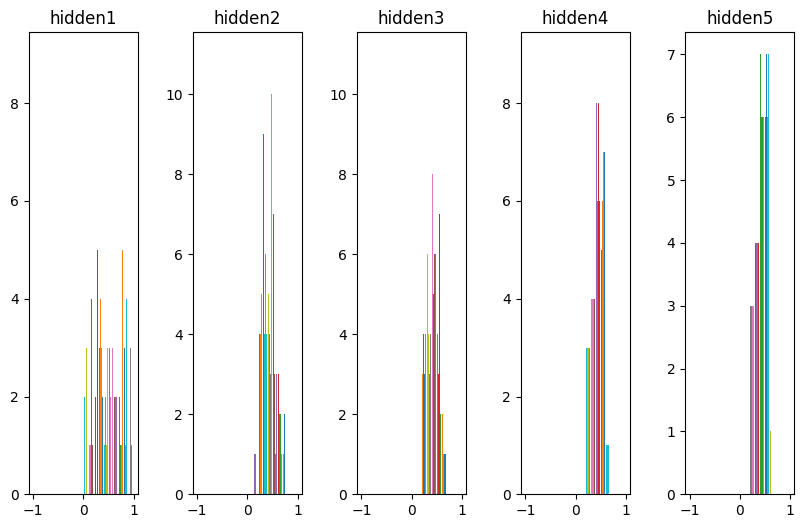

In [10]:
## He 균일분포 초기화
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

## 비선형 함수 가중치 초기화

#### 1. 제로 초기화

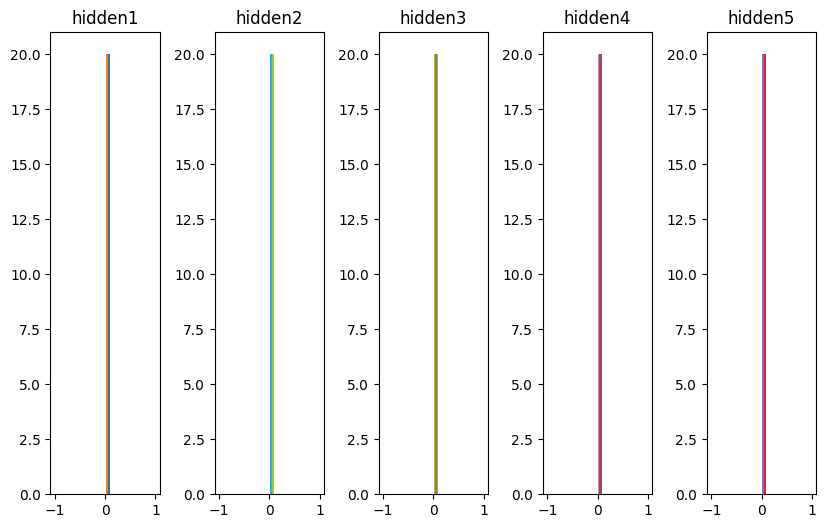

In [11]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

#### 2. 정규분포 초기화

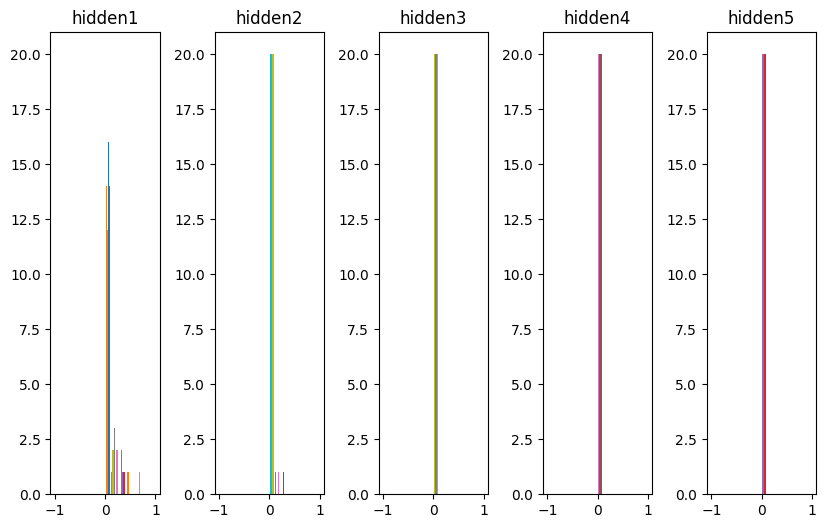

In [12]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

#### 3. 균일분포 초기화

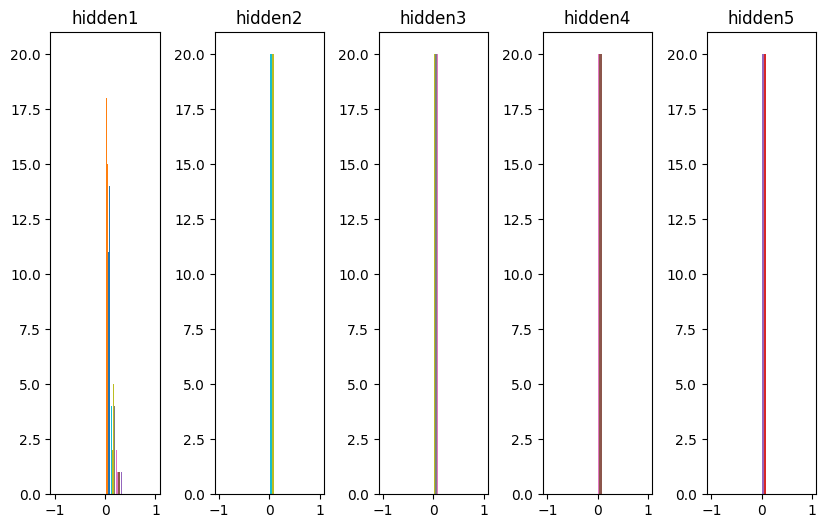

In [13]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

#### 4. Xavier(Glorot) 정규분포 초기화

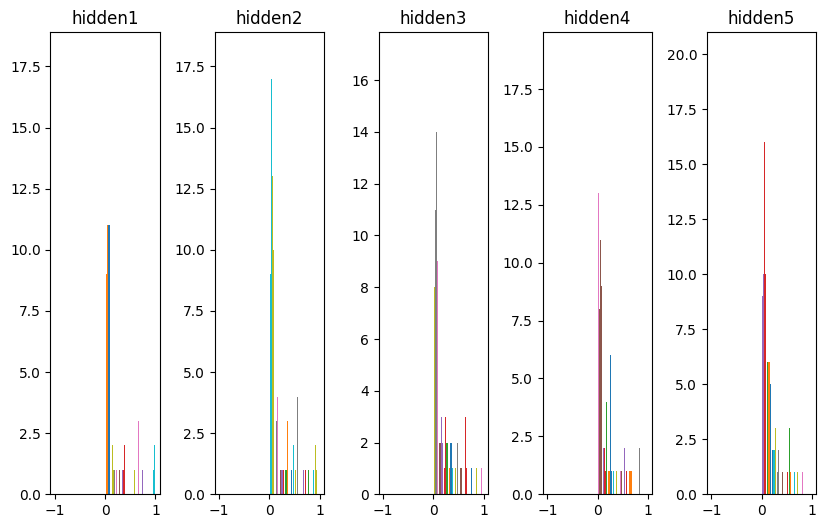

In [14]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

#### 5. Xavier(Glorot) 균일분포 초기화

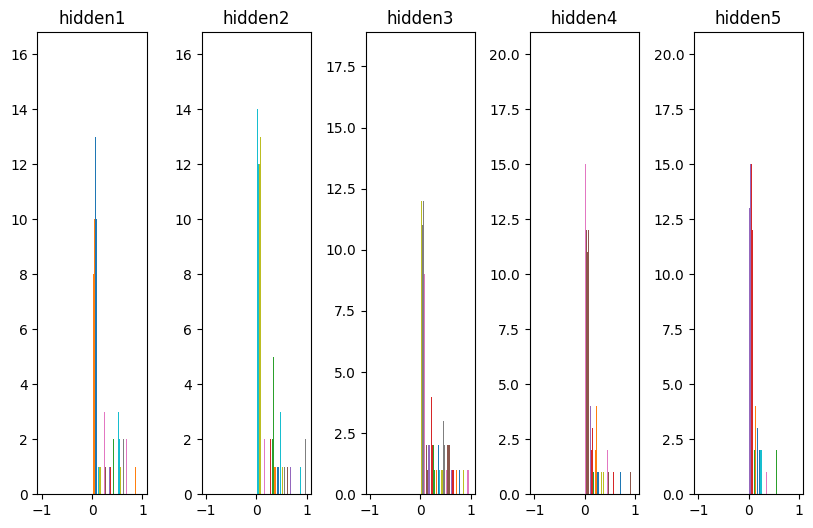

In [15]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

#### 6. He 정규분포 초기화

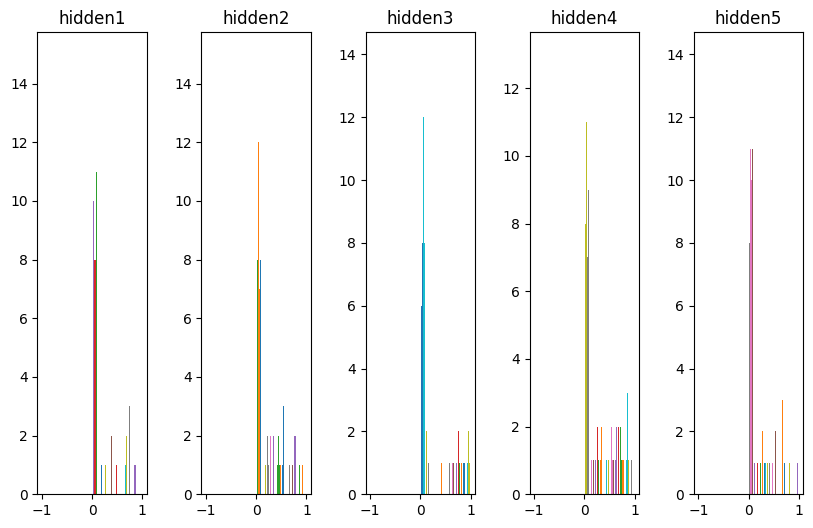

In [16]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

#### 7. He 균일분포 초기화

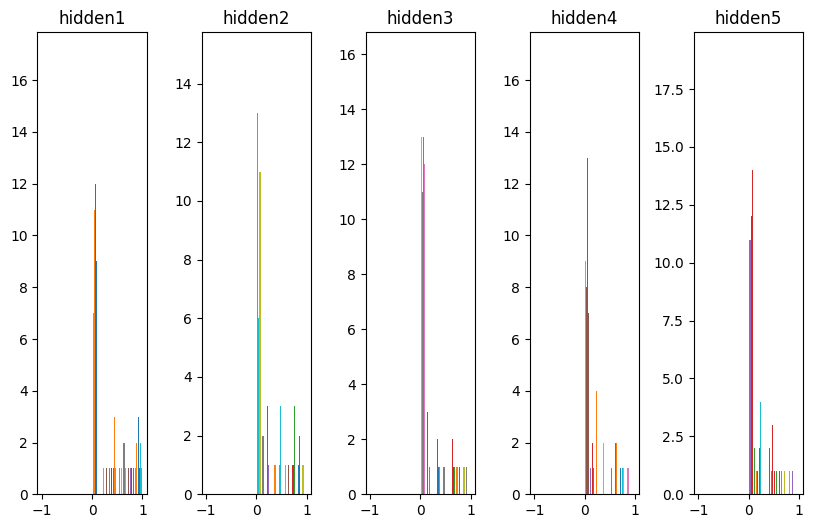

In [17]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

# 10-3 Reuters 딥러닝 모델 예제

In [18]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [19]:
word_index = reuters.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [20]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [21]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [22]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 모델 구성

In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1302574 (4.97 MB)
Trainable params: 1302574 (4.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40


18/18 [==============================] - 1s 22ms/step - loss: 2.2831 - accuracy: 0.5502 - val_loss: 1.5127 - val_accuracy: 0.6745
Epoch 2/40
18/18 [==============================] - 0s 11ms/step - loss: 1.2456 - accuracy: 0.7271 - val_loss: 1.2073 - val_accuracy: 0.7386
Epoch 3/40
18/18 [==============================] - 0s 11ms/step - loss: 0.9339 - accuracy: 0.7957 - val_loss: 1.0632 - val_accuracy: 0.7676
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.7193 - accuracy: 0.8439 - val_loss: 1.0122 - val_accuracy: 0.7671
Epoch 5/40
18/18 [==============================] - 0s 12ms/step - loss: 0.5605 - accuracy: 0.8793 - val_loss: 0.9322 - val_accuracy: 0.7881
Epoch 6/40
18/18 [==============================] - 0s 12ms/step - loss: 0.4419 - accuracy: 0.9056 - val_loss: 0.9085 - val_accuracy: 0.7992
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 0.3563 - accuracy: 0.9220 - val_loss: 0.9379 - val_accuracy: 0.7903
Epoch 8/40


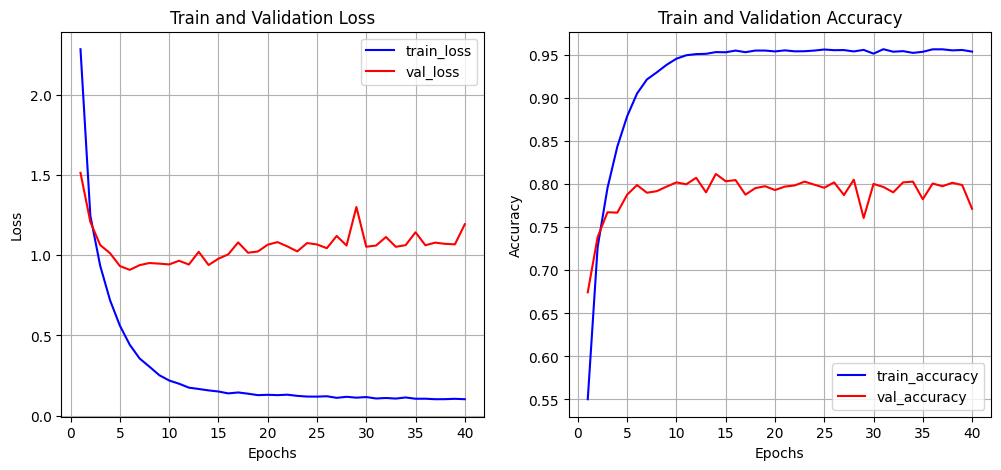

In [26]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 가중치 초기화

- Reuters 딥러닝 모델에 가중치 초기화를 적용한 결과를 살펴보기 위해 초기화 initializer에 따라 모델을 생성하는 build_model 함수를 정의

In [27]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
  model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [28]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

Epoch 1/40
18/18 [==============================] - 1s 21ms/step - loss: 3.8106 - accuracy: 0.0832 - val_loss: 3.7958 - val_accuracy: 0.0467
Epoch 2/40
18/18 [==============================] - 0s 12ms/step - loss: 3.7844 - accuracy: 0.1151 - val_loss: 3.7728 - val_accuracy: 0.2110
Epoch 3/40
18/18 [==============================] - 0s 12ms/step - loss: 3.7616 - accuracy: 0.2626 - val_loss: 3.7507 - val_accuracy: 0.2110
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 3.7394 - accuracy: 0.2525 - val_loss: 3.7289 - val_accuracy: 0.2110
Epoch 5/40
18/18 [==============================] - 0s 11ms/step - loss: 3.7173 - accuracy: 0.3045 - val_loss: 3.7073 - val_accuracy: 0.2110
Epoch 6/40
18/18 [==============================] - 0s 12ms/step - loss: 3.6954 - accuracy: 0.2828 - val_loss: 3.6858 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 3.6737 - accuracy: 0.3334 - val_loss: 3.6645 - val_accuracy: 0.3620
Epoch 8/40
18

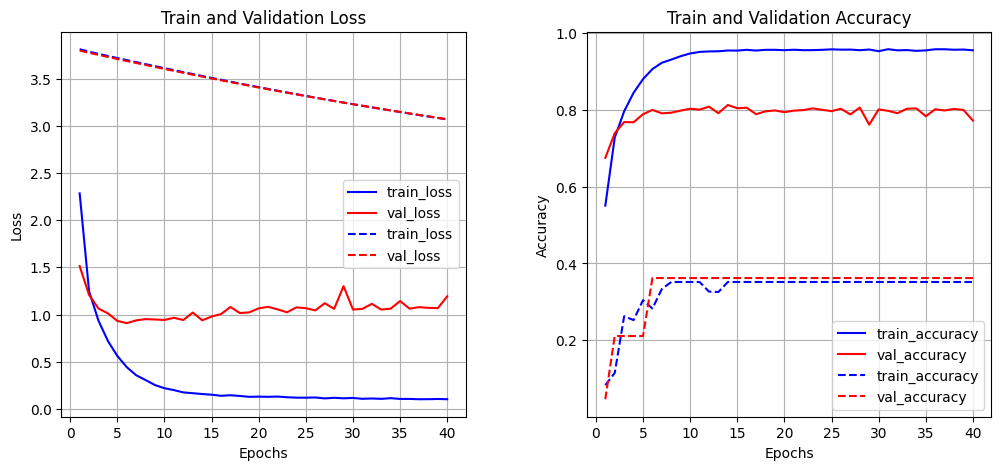

In [29]:
zero_history = build_model(initializers.Zeros())
diff_history(history, zero_history)

Epoch 1/40
18/18 [==============================] - 1s 20ms/step - loss: 2.4540 - accuracy: 0.4715 - val_loss: 1.7166 - val_accuracy: 0.6020
Epoch 2/40
18/18 [==============================] - 0s 12ms/step - loss: 1.5212 - accuracy: 0.6513 - val_loss: 1.4464 - val_accuracy: 0.6812
Epoch 3/40
18/18 [==============================] - 0s 12ms/step - loss: 1.2142 - accuracy: 0.7292 - val_loss: 1.2841 - val_accuracy: 0.7106
Epoch 4/40
18/18 [==============================] - 0s 11ms/step - loss: 1.0131 - accuracy: 0.7752 - val_loss: 1.1466 - val_accuracy: 0.7413
Epoch 5/40
18/18 [==============================] - 0s 12ms/step - loss: 0.8374 - accuracy: 0.8118 - val_loss: 1.0701 - val_accuracy: 0.7569
Epoch 6/40
18/18 [==============================] - 0s 12ms/step - loss: 0.7044 - accuracy: 0.8397 - val_loss: 1.0138 - val_accuracy: 0.7631
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 0.5833 - accuracy: 0.8671 - val_loss: 0.9754 - val_accuracy: 0.7729
Epoch 8/40
18

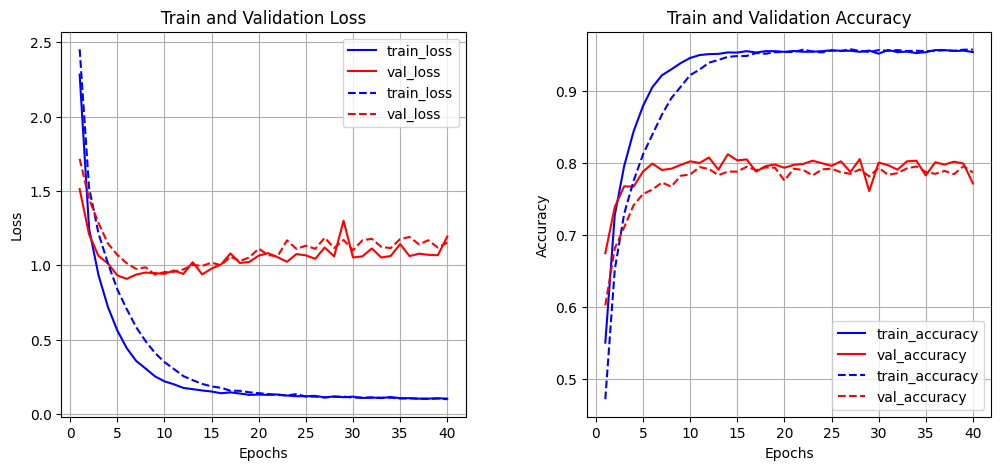

In [30]:
normal_history = build_model(initializers.RandomNormal())
diff_history(history, normal_history)

Epoch 1/40
18/18 [==============================] - 1s 21ms/step - loss: 2.1770 - accuracy: 0.5617 - val_loss: 1.4855 - val_accuracy: 0.6892
Epoch 2/40
18/18 [==============================] - 0s 12ms/step - loss: 1.2229 - accuracy: 0.7330 - val_loss: 1.2257 - val_accuracy: 0.7235
Epoch 3/40
18/18 [==============================] - 0s 11ms/step - loss: 0.9232 - accuracy: 0.7963 - val_loss: 1.0673 - val_accuracy: 0.7591
Epoch 4/40
18/18 [==============================] - 0s 11ms/step - loss: 0.7146 - accuracy: 0.8426 - val_loss: 0.9731 - val_accuracy: 0.7774
Epoch 5/40
18/18 [==============================] - 0s 11ms/step - loss: 0.5411 - accuracy: 0.8843 - val_loss: 0.9323 - val_accuracy: 0.7841
Epoch 6/40
18/18 [==============================] - 0s 12ms/step - loss: 0.4367 - accuracy: 0.9057 - val_loss: 0.9093 - val_accuracy: 0.7912
Epoch 7/40
18/18 [==============================] - 0s 11ms/step - loss: 0.3527 - accuracy: 0.9256 - val_loss: 0.9045 - val_accuracy: 0.7988
Epoch 8/40
18

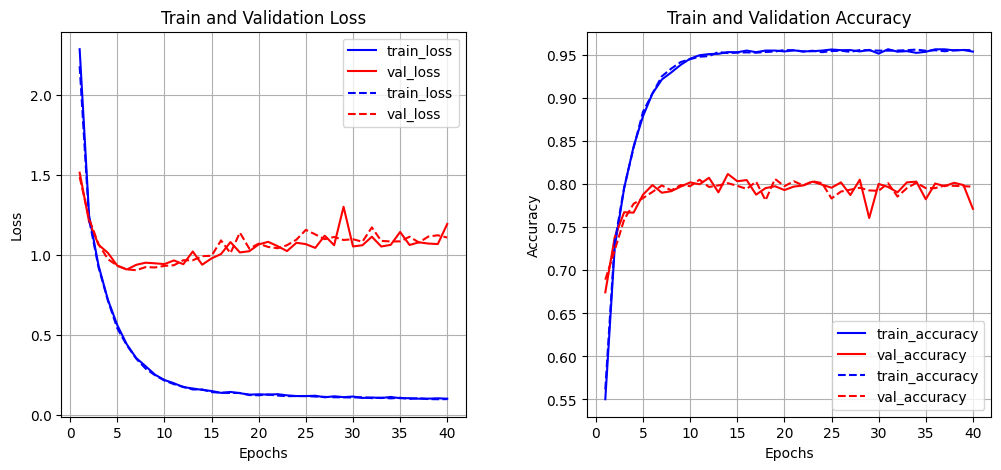

In [31]:
glorot_history = build_model(initializers.GlorotNormal())
diff_history(history, glorot_history)

Epoch 1/40
18/18 [==============================] - 1s 19ms/step - loss: 2.2058 - accuracy: 0.5718 - val_loss: 1.4184 - val_accuracy: 0.6768
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.1398 - accuracy: 0.7478 - val_loss: 1.1383 - val_accuracy: 0.7427
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.8191 - accuracy: 0.8191 - val_loss: 0.9865 - val_accuracy: 0.7765
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.6035 - accuracy: 0.8724 - val_loss: 0.9030 - val_accuracy: 0.7925
Epoch 5/40
18/18 [==============================] - 0s 11ms/step - loss: 0.4534 - accuracy: 0.9026 - val_loss: 0.8675 - val_accuracy: 0.7992
Epoch 6/40
18/18 [==============================] - 0s 11ms/step - loss: 0.3557 - accuracy: 0.9241 - val_loss: 0.8957 - val_accuracy: 0.7970
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 0.2920 - accuracy: 0.9349 - val_loss: 0.8847 - val_accuracy: 0.7992
Epoch 8/40
18

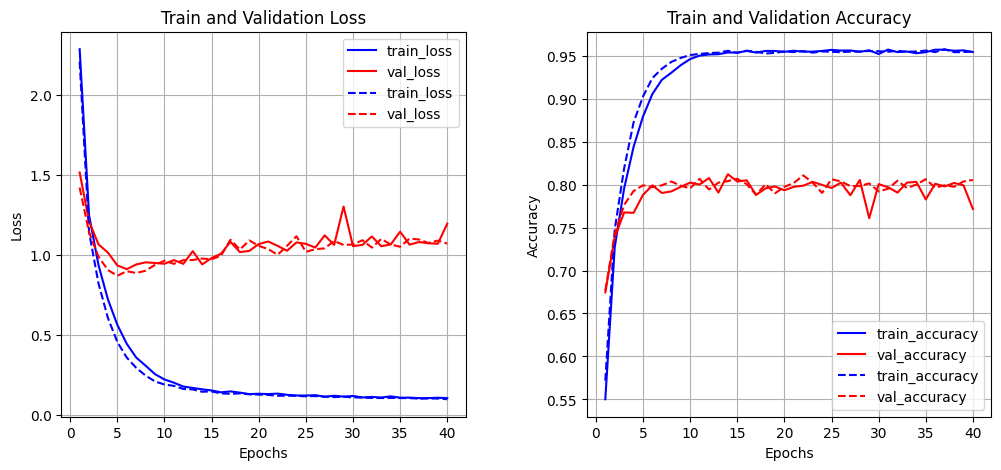

In [32]:
he_history = build_model(initializers.HeNormal())
diff_history(history, he_history)

# 10-4. Batch Normalization

In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128)             

In [34]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 24ms/step - loss: 1.7314 - accuracy: 0.6555 - val_loss: 3.3372 - val_accuracy: 0.7351
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 0.6351 - accuracy: 0.8786 - val_loss: 3.0955 - val_accuracy: 0.7177
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3510 - accuracy: 0.9324 - val_loss: 2.7630 - val_accuracy: 0.6866
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.2359 - accuracy: 0.9475 - val_loss: 2.4347 - val_accuracy: 0.6674
Epoch 5/40
18/18 [==============================] - 0s 12ms/step - loss: 0.1817 - accuracy: 0.9517 - val_loss: 2.1055 - val_accuracy: 0.6750
Epoch 6/40
18/18 [==============================] - 0s 12ms/step - loss: 0.1545 - accuracy: 0.9521 - val_loss: 1.8366 - val_accuracy: 0.6790
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 0.1415 - accuracy: 0.9525 - val_loss: 1.5953 - val_accuracy: 0.7093
Epoch 8/40
18

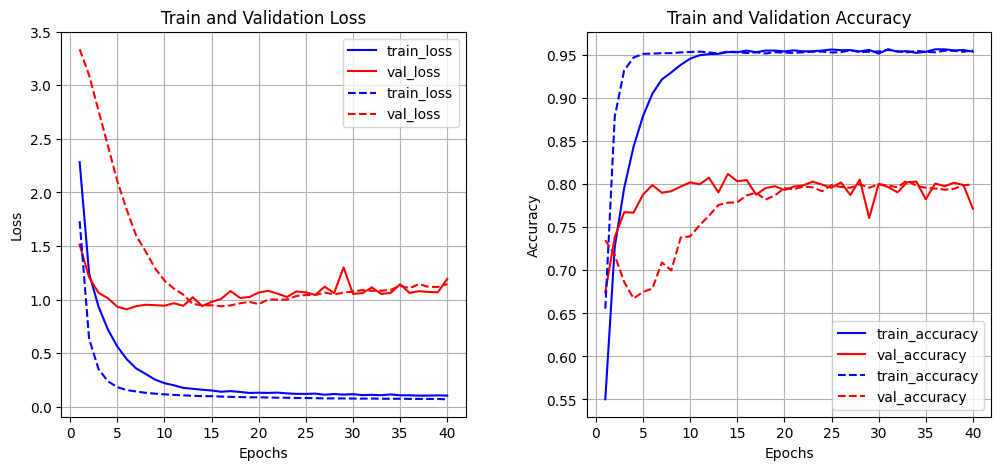

In [35]:
diff_history(history, batch_norm_history)